In [1]:
import os, re, csv, shutil
from lxml import etree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def get_meta(data, tree):
    parsed = tree
    
    n_list = parsed.xpath('//meta/n')
    n_text = [i.text for i in n_list]
    index_meta = n_text.index(data)
    
    v_list = parsed.xpath('//meta/v')
    return v_list[index_meta]

In [3]:
cor_dict = {}
with open('periodos_tycho.csv', mode='r') as file:
    reader = csv.reader(file)
    cor_dict = {row[1][:-4]+'.xml':row[0] for row in reader}

In [7]:
dir_path = 'xml/xml_sorts/v1'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

if not os.path.exists(dir_path + '/p1'):
    os.makedirs(dir_path + '/p1')
if not os.path.exists(dir_path + '/p2'):
    os.makedirs(dir_path + '/p2')
if not os.path.exists(dir_path + '/p3'):
    os.makedirs(dir_path + '/p3')    

In [8]:
for root, dirs, files in os.walk("./xml/original", topdown=False):
    for file in files:
        if cor_dict[file] == 'arcmed':
            source = os.path.join(root,file)
            target = dir_path + '/p1'
            shutil.copy(source,target)
        if cor_dict[file] == 'mod':
            source = os.path.join(root,file)
            target = dir_path + '/p2'
            shutil.copy(source,target)
        if cor_dict[file] == 'cont1' or cor_dict[file] == 'cont2':
            source = os.path.join(root,file)
            target = dir_path + '/p3'
            shutil.copy(source,target)

In [8]:
gen_count_1 = {}
for root, dirs, files in os.walk('./xml/xml_sorts/v1/p1', topdown=False):
    for file in files:
        with open(os.path.join(root,file) , mode='r') as xml_file:
            parsed = etree.parse(xml_file)
            node = get_meta('Genre', parsed)
            gen_count_1[node.text] = gen_count_1.get(node.text, 0) + 1
print(gen_count_1)

{'Narrative; Chronicle': 3, 'Dissertation': 1, 'Theatre': 4, 'Chronica do muito alto e muito esclarecido principe D. Affonso Henriques primeiro Rey de Portugal': 1, 'Narrative': 2, 'Letters': 1, 'Grammar': 1}


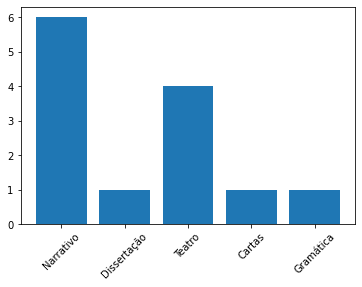

<Figure size 432x288 with 0 Axes>

In [11]:
gen_count_1 = {'Narrativo': 6, 'Dissertação': 1, 'Teatro': 4, 'Cartas': 1, 'Gramática': 1}
plt.bar(range(len(gen_count_1)), list(gen_count_1.values()), align='center')
plt.xticks(range(len(gen_count_1)), list(gen_count_1.keys()))
plt.xticks(rotation=45)
plt.show()

plt.savefig('obra_p_genero_1.png')

In [48]:
gen_count_2 = {}
for root, dirs, files in os.walk('./xml/xml_sorts/v1/p2', topdown=False):
    for file in files:
        with open(os.path.join(root,file) , mode='r') as xml_file:
            parsed = etree.parse(xml_file)
            node = get_meta('Genre', parsed)
            gen_count_2[node.text] = gen_count_2.get(node.text, 0) + 1
print(gen_count_2)



{'Theatre': 3, None: 1, 'Transcript of original manuscript': 1, 'Letters': 6, 'Dissertation': 4, 'News': 3, 'Narrative': 9, 'Grammar': 1}


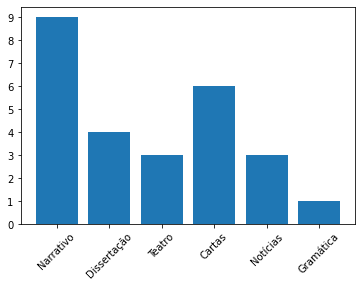

<Figure size 432x288 with 0 Axes>

In [9]:
gen_count_2 = {'Narrativo': 9, 'Dissertação': 4, 'Teatro': 3, 'Cartas': 6,
               'Notícias': 3, 'Gramática':1}


plt.bar(range(len(gen_count_2)), list(gen_count_2.values()), align='center')
plt.xticks(range(len(gen_count_2)), list(gen_count_2.keys()))
plt.yticks(np.arange(0, 10, step=1))
plt.xticks(rotation=45)
plt.show()
plt.savefig('obra_p_genero_2.png')

In [49]:
gen_count_3 = {}
for root, dirs, files in os.walk('./xml/xml_sorts/v1/p3', topdown=False):
    for file in files:
        with open(os.path.join(root,file) , mode='r') as xml_file:
            parsed = etree.parse(xml_file)
            node = get_meta('Genre', parsed)
            gen_count_3[node.text] = gen_count_3.get(node.text, 0) + 1
print(gen_count_3)

{'Theatre': 8, 'Grammar': 1, 'Narrative': 6, 'Dissertation': 2, 'News': 3, 'Newspaper': 3, 'Letters': 10, 'ata': 2}


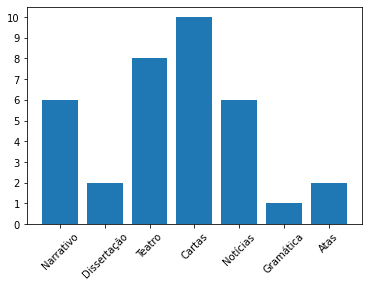

<Figure size 432x288 with 0 Axes>

In [10]:
gen_count_3 = {'Narrativo': 6, 'Dissertação': 2, 'Teatro': 8, 'Cartas': 10,
               'Notícias': 6, 'Gramática': 1, 'Atas': 2}


plt.bar(range(len(gen_count_3)), list(gen_count_3.values()), align='center')
plt.xticks(range(len(gen_count_3)), list(gen_count_3.keys()))
plt.yticks(np.arange(0, 11, step=1))
plt.xticks(rotation=45)
plt.show()
plt.savefig('obra_p_genero_3.png')

In [ ]:
fig = plt.figure()

ax1 = plt.subplot(211)
ax1.plot(cycles,np.asarray(df_int),'wo',label='')
ax1.plot(cycles,np.asarray(df_proj),'k+',label='')
ax1.legend(loc=2)
#ax1.subplots_adjust(left=0.15)
ax1.set_ylim(0.001,0.004)

ax2 = plt.subplot(223)
i2=ax2.imshow(c,cmap=plt.cm.hot, vmin=-5, vmax=5);#plt.colorbar();plt.clim(-5,5)
cb2=plt.colorbar(i2,ax=ax2,ticks=[-5,0,5],fraction=0.046, pad=0.04,format='%.2f')
cb2.ax.tick_params(labelsize=12)



ax3 = plt.subplot(224)
i3=ax3.imshow(residue_proj,cmap=plt.cm.hot, vmin=-5, vmax=5);#plt.colorbar();plt.clim(-5,5);
cb3=plt.colorbar(i3,ax=ax3,ticks=[-5,0,5],fraction=0.046, pad=0.04,format='%.2f')
cb3.ax.tick_params(labelsize=12)

plt.savefig('test.png', dpi=500,  bbox_inches='tight', pad_inches=0.1)
#plt.show()


AttributeError: 'AxesSubplot' object has no attribute 'xticks'

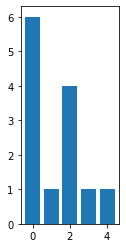

In [18]:
gs = gridspec.GridSpec(1, 3)

fig = plt.figure()
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
gen_count_1 = {'Narrativo': 6, 'Dissertação': 1, 'Teatro': 4, 'Cartas': 1, 'Gramática': 1}
ax1.bar(range(len(gen_count_1)), list(gen_count_1.values()), align='center')
ax1.xticks(range(len(gen_count_1)), list(gen_count_1.keys()))
ax1.xticks(rotation=45)
ax1.show()
ax1.plot([0,1])

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2.bar(range(len(gen_count_2)), list(gen_count_2.values()), align='center')
ax2.xticks(range(len(gen_count_2)), list(gen_count_2.keys()))
ax2.yticks(np.arange(0, 10, step=1))
ax2.xticks(rotation=45)
ax2.show()
ax2.plot([0,1])

ax3 = fig.add_subplot(gs[0, 2]) 
ax3.bar(range(len(gen_count_3)), list(gen_count_3.values()), align='center')
ax3.xticks(range(len(gen_count_3)), list(gen_count_3.keys()))
ax3.yticks(np.arange(0, 11, step=1))
ax3.xticks(rotation=45)

ax3.plot([0,1])

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4)

# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=[0.1, 0.5, 0.9], xticklabels=['a', 'b', 'c'],
        yticks=[1, 2, 3])

TypeError: 'AxesSubplot' object is not subscriptable

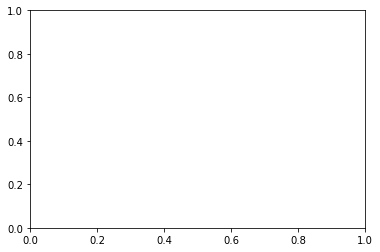

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1)

plt.sca(axes[0, 0])

plt.bar(range(len(gen_count_1)), list(gen_count_1.values()), align='center')
plt.xticks(range(len(gen_count_1)), list(gen_count_1.keys()))
plt.xticks(rotation=45)
ax1.plot([0,0])